In [6]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 

class HTMLTableParser:
    def parse_url(self,url):
        response=requests.get(url) #그 주소의 html이나 txt를 가져온다.
        soup=BeautifulSoup(response.text,'lxml') #(텍스트, parsing방식)
        return [(self.parse_html_table(table)) for table in soup.find_all('table')]
        #테이블이 들어간 모든 코드들에 대해서 parse_html_table한 것을 리스트로 리턴
        
    def parse_html_table(self,table):
        n_col=0
        n_row=0
        col_names=[]
        for row in table.find_all('tr'):
            td_tags=row.find_all('td') #td가 들어간 tag list
            if len(td_tags)>0: #td 태그가 있을 경우
                n_row+=1 
                if n_col==0:
                    n_col=len(td_tags) #td tag의 개수를 넣는다 (1번.)
            th_tags=row.find_all('th')#table>tr>th(head),td(data)
            if len(th_tags)>0 and len(col_names)==0: #head는 있는데 colname은 아직 모르는 경우
                for th in th_tags: #각 head에 대해 
                    col_names.append(th.get_text()) #col_names에는 모든 th들의 text 내용을 리스트에 넣는다. 
                    
        if len(col_names)>0 and len(col_names)!=n_col: #col_name을 알아냈는데 col수랑 안맞는 경우
            raise Exception('colum titles do not match the number of columns')
            
        columns=col_names if len(col_names)>0 else range(0,n_col) #col_name을 알아냈으면 col_name이며, 모르면 0,1,2숫자
        df=pd.DataFrame(columns=columns,index=range(0,n_row)) #column이름,index 정한 데이터프레임
        row_marker=0 #현재 행 표시기
        for row in table.find_all('tr'): #각 tr에 대해
            col_marker=0 #현재 열 표시기 0으로 시작
            columns=row.find_all('td') #각 row의 td에 대해
            for column in columns: #한개의 td는 한개의 column
                df.iat[row_marker,col_marker]=column.get_text()
                col_marker+=1
            if len(columns)>0:
                row_marker+=1
                
        for col in df:
            try:
                if col--'Rank':
                    continue
                df[col]-df[col].astype(float)
            except:
                pass
        return df

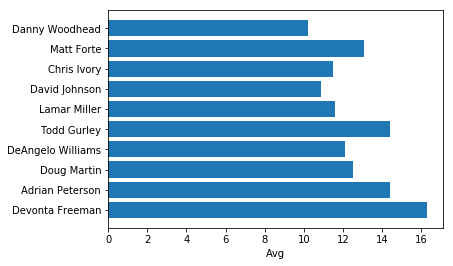

In [7]:
url='https://www.fantasypros.com/nfl/reports/leaders/rb.php?year=2015'
hp=HTMLTableParser()
table=hp.parse_url(url)[0]
table
avg=table['Avg'].values
table
table['Avg']=list(map(lambda x:float(x),table.Avg))
table
topten=list(table.loc[0:9,'Player'])
topten
topavg=list(table.loc[0:9,'Avg'])
plt.figure()
plt.barh(range(10),topavg)
plt.xlabel('Avg')
plt.yticks(np.arange(10),topten)
plt.show()